# chap04_homework

홀수번: 2, 7, 10, 14 번 풀이 

## import Lib

In [2]:
import numpy as np
import matplotlib.pylab as plt
import time
import nbimporter
from chap03_module import *
from chap04_module import *

## code

### Problem 2

x(n)= [3, 2, 1, 0]
X(k)= [6.+0.j 2.-2.j 2.+0.j 2.+2.j]
|X(k)|= [6.       2.828427 2.       2.828427]


Text(0, 0.5, '|X(k)|')

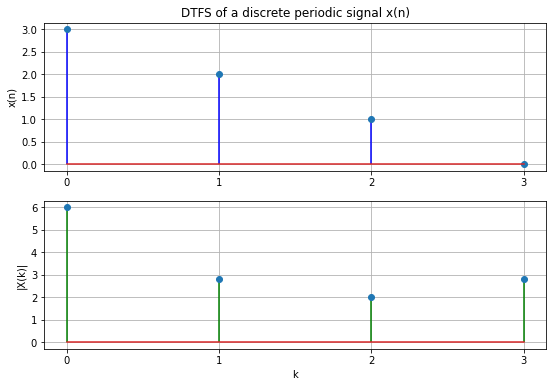

In [3]:
# 시퀀스 생성
xn = [3,2,1,0]         # x(n): 이산시간 주기신호, 주기가 4인 신호
print("x(n)=",xn)
N = len(xn)            # N: 신호 x(n)의 주기       
Xk = DTFS(xn, N)
print("X(k)=", Xk)
print("|X(k)|=", np.abs(Xk))

n = np.arange(N)       # 순서시퀀스 생성

plt.figure(figsize=(9,6))
plt.subplot(2,1,1); plt.stem(n,xn,'b'); plt.xticks(range(0,4)); plt.grid()
plt.title("DTFS of a discrete periodic signal x(n)"); plt.ylabel("x(n)")
plt.subplot(2,1,2); plt.stem(n,np.abs(Xk),'g'); plt.xticks(range(0,4)); plt.grid()
plt.xlabel("k"); plt.ylabel("|X(k)|")


### Problem 7

#### (1) 영-패딩  vs  영-패딩 없이

In [4]:
N = 10
xn = np.zeros(N, dtype = "float")
for i in range(N):
    xn[i] = np.cos(0.48*np.pi*i) + np.cos(0.52*np.pi*i)

Xk = DFT(xn,N)
magXk = np.abs(Xk)

n = np.arange(N)
fn = np.linspace(0, np.pi, int(N/2)+1)

([<matplotlib.axis.XTick at 0x2d5fddc13d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

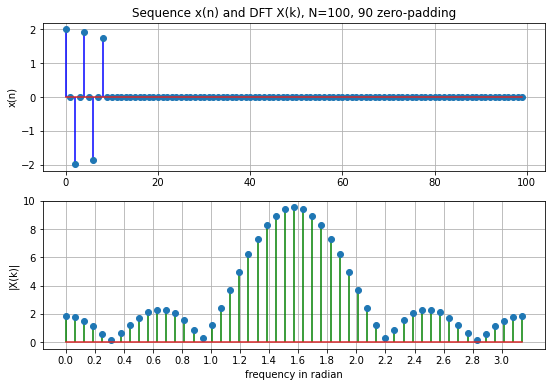

In [18]:
# 고밀도스펙트럼을 위한 스퀀스 생성
## x(n)이 1-10에 대해서만 cos(0.48*pi*n)+cos(0.52*pi*n)값을 가진다(나머지는 모두 0)
N1 = 100
xn1 = np.zeros(N1, dtype="float")
xn1[0:N] = xn
Xk1 = DFT(xn1, N1)
magXk1 = np.abs(Xk1)

n1 = np.arange(N1)
fn = np.linspace(0, np.pi, int(N1/2)+1)

# 그래프
plt.figure(figsize=(9,6))
plt.subplot(2,1,1); plt.stem(n1,xn1,'b'); plt.grid()
plt.title("Sequence x(n) and DFT X(k), N=100, 90 zero-padding"); plt.ylabel("x(n)")
plt.subplot(2,1,2); plt.stem(fn,magXk1[0:int(N1/2+1)],'g'); plt.grid()
plt.ylabel("|X(k)|"); plt.xlabel("frequency in radian"); plt.xticks(np.arange(0, 3.2 ,0.2))

|X(k)|=
 [1.56402669e-14 3.24006264e-14 2.87591877e-14 2.86384855e-14
 9.46630537e-14 6.85869073e-14 6.36400383e-14 2.57275483e-14
 1.66758290e-14 3.99732297e-14 4.88597234e-14 3.51595042e-14
 4.13924842e-14 3.81761578e-14 2.52800541e-14 4.98216241e-14
 7.40158870e-14 5.74910603e-14 3.18139442e-14 9.47243315e-14
 9.18716532e-14 5.52686186e-14 7.87956872e-14 2.00408727e-13
 5.00000000e+01 1.15897336e-13 5.00000000e+01 1.61191901e-13
 8.08738994e-14 7.19989457e-14 5.16847036e-14 1.65751507e-14
 6.28767329e-14 1.02222267e-13 3.92975888e-14 1.37853799e-13
 1.13025956e-13 5.87946711e-14 8.84607600e-14 1.56890424e-13
 6.29418054e-14 4.46772271e-14 7.50026872e-14 1.54940879e-13
 9.45736680e-14 2.69624546e-14 1.38544748e-13 1.38178206e-13
 9.46788560e-14 1.67285890e-13 1.47627787e-13 1.41010603e-13
 1.05934819e-13 5.82149482e-14 1.07949931e-13 7.09868701e-14
 1.28283031e-13 2.35252410e-13 1.25110276e-13 1.42406649e-13
 8.22469737e-14 7.06696596e-14 2.80038884e-14 3.70483605e-14
 2.24762646e-13

([<matplotlib.axis.XTick at 0x2d5fde67220>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

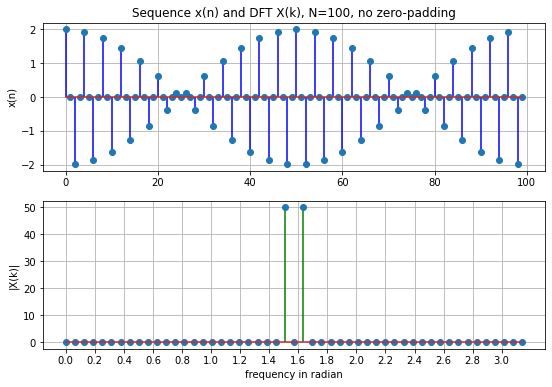

In [19]:
# 고해상도스펙트럼을 위한 시퀀스 생성
## x(n)이 모든 n에 대해서 cos(0.48*pi*n)+cos(0.52*pi*n)값을 가진다
N2 =100
xn = np.arange(N2, dtype="float")
for i in range(N2):
    xn[i] = np.cos(0.48*np.pi*i) + np.cos(0.52*np.pi*i)
Xk2 = DFT(xn,N2)
len(Xk2)
magXk2 = np.abs(Xk2)
print("|X(k)|=\n",magXk2)

n2= np.arange(N2)
fn = np.linspace(0, np.pi, int(N2/2)+1)

# 그래프
plt.figure(figsize=(9,6))
plt.subplot(2,1,1); plt.stem(n2,xn,'b'); plt.grid()
plt.title("Sequence x(n) and DFT X(k), N=100, no zero-padding"); plt.ylabel("x(n)")
plt.subplot(2,1,2); plt.stem(fn,magXk2[0:int(N2/2+1)],'g'); plt.grid()
plt.ylabel("|X(k)|"); plt.xlabel("frequency in radian"); plt.xticks(np.arange(0, 3.2 ,0.2))

#### (2) 고밀도 스펙트럼 vs 고해상도 스펙트럼 

- 고밀도 스펙트럼:
- 고해상도 스펙트럼: 

### Problem 10

손으로 직접 그려보기 

### Problem 14

#### (1)

Text(0.5, 0, 'n')

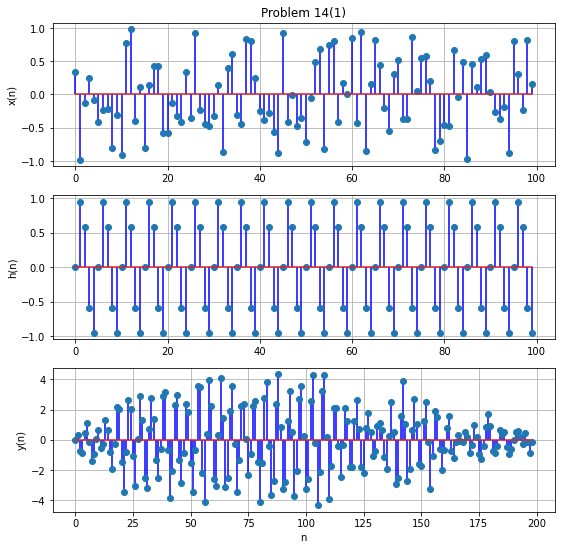

In [5]:
# 시퀀스 생성
n = np.arange(0,100)
xn = 2*np.random.rand(len(n))-1
hn = np.sin(0.4*np.pi*n)

ny, yn = convolve_m(n,xn,n,hn)

# 그래프 
plt.figure(figsize=(9,9))
plt.subplot(3,1,1); plt.stem(n,xn,'b'); plt.grid()
plt.title("Problem 14(1)"); plt.ylabel("x(n)")
plt.subplot(3,1,2); plt.stem(n,hn,'b'); plt.grid()
plt.ylabel("h(n)")
plt.subplot(3,1,3); plt.stem(ny,yn,'b'); plt.grid()
plt.ylabel("y(n)"); plt.xlabel('n')


#### (2)

In [6]:
from timeit import default_timer as timer
from datetime import timedelta

In [7]:
# 시퀀스 생성 
N1 = 1024
n1 = np.arange(N1)

start_1024 = timer()
Xk1 = np.fft.fft(yn,N1)
end_1024 = timer()
print("time_1024:", timedelta(seconds=end_1024-start_1024))

magXk1 = np.abs(Xk1)

time_1024: 0:00:00.000330


In [8]:
N2 = 2048
n2 = np.arange(N2)

start_2048 = timer()
Xk2 = np.fft.fft(yn,N2)
end_2048 = timer()
print("time_2048:", timedelta(seconds=end_2048-start_2048))

magXk2 = np.abs(Xk2)

time_2048: 0:00:00.000210


In [9]:
N3 = 4096
n3 = np.arange(N3)

start_4096 = timer()
Xk3 = np.fft.fft(yn,N3)
end_4096 = timer()
print("time_4096:", timedelta(seconds=end_4096-start_4096))

magXk3 = np.abs(Xk3)

time_4096: 0:00:00.000779


Text(0.5, 0, 'n')

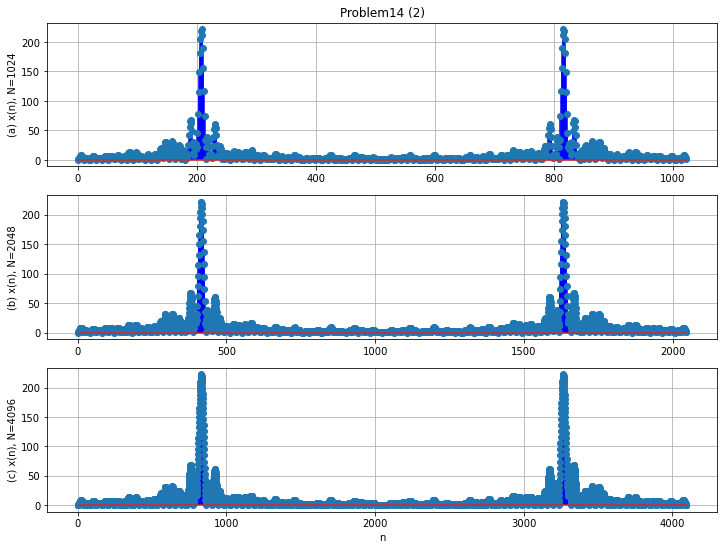

In [12]:
# 그래프 
plt.figure(figsize=(12,9))
plt.subplot(3,1,1); plt.stem(n1,magXk1,'b'); plt.grid()
plt.title("Problem14 (2)"); plt.ylabel("(a) x(n), N=1024")
plt.subplot(3,1,2); plt.stem(n2,magXk2,'b'); plt.grid()
plt.ylabel("(b) x(n), N=2048")
plt.subplot(3,1,3); plt.stem(n3,magXk3,'b'); plt.grid()
plt.ylabel("(c) x(n), N=4096"); plt.xlabel('n')

#### (3)